## Implement a basic driving agent
**In your report, mention what you see in the agent’s behavior. Does it eventually make it to the target location?**

When I set the agent to choose a random action, it travels around randomly, disobeying road rules and running through red lights. It eventually does make the destination. I would call this a behaviour highly explorative.

## Identify and update state
**Justify why you picked these set of states, and how they model the agent and its environment.**

I initially selected a large state space that used all available information. This included
- Light color
- Car direction at each intersection
- Next waypoint
- Deadline

This state space has more information than is required for the agent to work sufficiently, so I refined it. Firstly I dropped the deadline as it has the largest impact on the state space size, and then I refined which information that I needed from the intersection traffic. The state space became
- Light color
- Oncoming car going forward
- Oncoming car turning left
- Next waypoint

This state space has enough information to model the world, including the give way rules, which I soon found out were not implememnted, and so I refined the state space further to it's canonical form.
- Light color
- Next waypoint

## Implement Q-Learning
**What changes do you notice in the agent’s behavior?**

I implemented q-learning and made the agent chose the action that correlated with the highest q-value in the state. I notice that the agent would quickly fall into a local minimum of doing the same action, which was either "do nothing" or "turn right". Each of those actions would give a reward of one in all situations.

## Enhance the driving agent

**Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties?**

Overall the agent performs very well. The q-values will normally converge to an optimal policy within 5 trials, which will only be disrupted by the randomness built into the action choice. I mitigated this by enforcing no random action will happen after 70% of trials have been run.

I used a number of techniques to enhance the agent from it's previous state.

To make the agent explore, I changed the way the state space was initialised. I set all new states to have a high q-value which makes the space highly explorable. I chose this initial value to be 2 after trying lower and higher values.

To make help the agent out of local minimums I added a randomness factor when chosing an action. This had the desired effect and the agent would no longer get stuck choosing the same response over and over. I set the random percentage to 20%

After tring a number of gamma and learing_rates I chose a gamma of 0.2 and learning rate of 0.1.

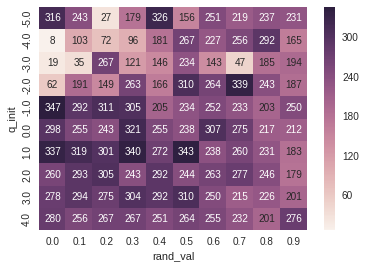

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

def show_heatmap(filename, columns):
    df = pd.read_csv(filename, header=None)
    df.columns=columns
    df2 = df.pivot(index=columns[0], columns=columns[1], values=columns[2])
    sns.heatmap(df2, annot=True, fmt="d")
show_heatmap("results.csv", ["q_init", "rand_val", "res"])

**Variable tuning**

In order to enhance the agent, I undertook parameter tuning by iterating over a number of variables. The graph above shows the total rewards after 50 trials varying the following 2 variables;
- q_init : the initial value for all q states
- rand_val : the chance of choosing a random action.

The plot shows high rewards scores within the ranges -1.0 < q_init =< 1.0 and 0.0 < rand_val =< 0.4.
The plot shows especially poor learning when q_init < -1.0 and rand_val < 0.4, which is consistant with the agent getting stuck in a local minimum with no way out.